# Convolutional Neural Network for Mnist Data on Keras

In [1]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

### Loading MNIST Dataset

In [2]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

### Reshaping the data

In [3]:
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

## Checking the Shape after reshaping

In [4]:
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Normalization of Data/Rescaling data

In [5]:
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

### Building the Model

In [6]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))

### Compiling the Model

In [7]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fitting the Model

In [8]:
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1564 - accuracy: 0.9530
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0562 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0057 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 35s 19m

### Evaluation

In [9]:
#evaluting the model
model.evaluate(X_test,y_test) ### the values of loss and accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9859


[0.0577855221927166, 0.9858999848365784]

## Predictions

In [10]:
#Making predictions
y_predict = model.predict(X_test)
y_predict[3] #printing the 3rd index

313/313 [==============================] - 1s 4ms/step


array([1.00000000e+00, 2.11311329e-13, 1.69402348e-09, 2.32578036e-14,
       1.45798606e-15, 3.85626128e-13, 2.34721775e-09, 1.16613654e-11,
       2.19320777e-13, 6.27477714e-12], dtype=float32)

In [11]:
# Here we get the index of the maximum value in the above-encoded vector. 
import numpy as np
np.argmax(y_predict[3])

0

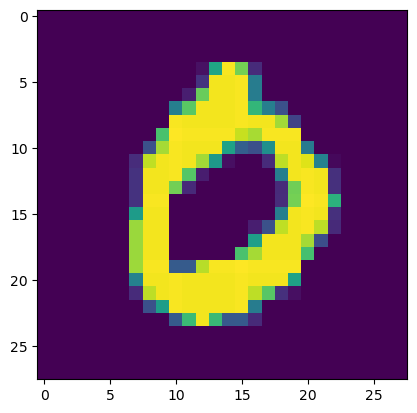

In [12]:
#checking if the predicting is correct
import matplotlib.pyplot as plt
plt.imshow(X_test[3])

## Confusion Matrix

<Axes: >

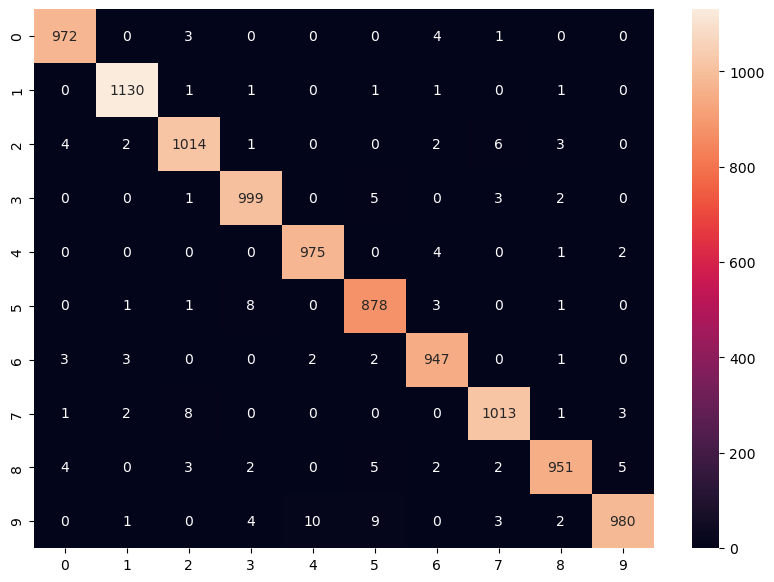

In [13]:
import seaborn as sns
y_predict_labels=np.argmax(y_predict,axis=1)
#Confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_predict_labels)
#visualizaing confusion matrix with heatmap
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d')